# Problem Statement 1: Load the "Country-data.csv" dataset into a DataFrame and perform

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('country_data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Create a seperate DataFrame with only numeric data by remove the "country" column
numeric_df = df.drop('country', axis=1)

In [4]:
#Scale the data using the Standard Scaler to create a scaled DataFrame
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


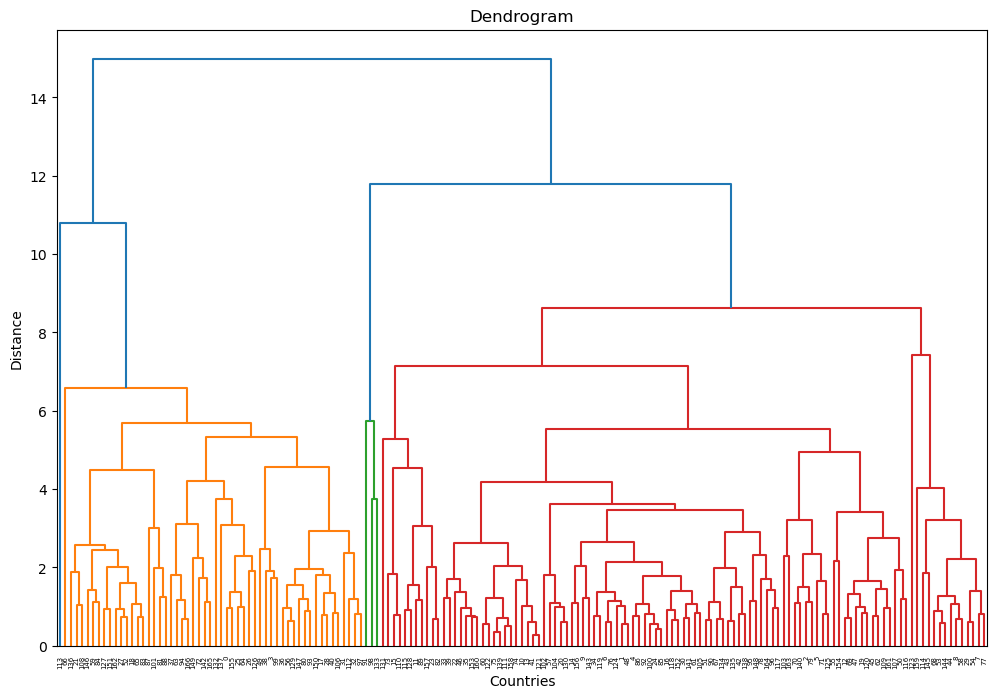

In [5]:
#Plotting dendograms with the complete linkage method
plt.figure(figsize=(12,8))
dendrogram(linkage(scaled_df, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')
plt.show()

In [6]:
# creating cluster labels using cut tree
num_clusters = 4 # Number of clusters to create
cluster_labels = cut_tree(linkage(scaled_df, method='complete'),n_clusters=num_clusters)
df['Cluster'] = cluster_labels
df['Cluster']

0      0
1      1
2      1
3      0
4      1
      ..
162    0
163    1
164    1
165    0
166    0
Name: Cluster, Length: 167, dtype: int32

In [7]:
#Perform the 4-Component PCA on DataFrame

pca = PCA(n_components=4)
pca_result = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1','PC2','PC3','PC4'])
df_pca = pd.concat([df['country'],pca_df], axis=1)

In [8]:
df_pca

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255
1,Albania,0.429911,-0.588156,-0.333486,-1.161059
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115
3,Angola,-2.932423,1.695555,1.525044,0.839625
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...,...
162,Vanuatu,-0.820631,0.639570,-0.389923,-0.706595
163,Venezuela,-0.551036,-1.233886,3.101350,-0.115311
164,Vietnam,0.498524,1.390744,-0.238526,-1.074098
165,Yemen,-1.887451,-0.109453,1.109752,0.056257


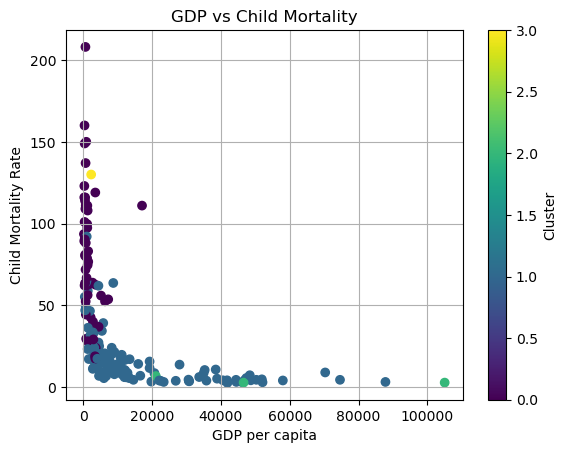

In [9]:
#analyze how low GDP rate corresponds to the child mortality rate around the world
plt.scatter(df['gdpp'], df['child_mort'], c=df['Cluster'], cmap='viridis')
plt.title('GDP vs Child Mortality')
plt.xlabel('GDP per capita')
plt.ylabel('Child Mortality Rate')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Problem Statement 2:  “Credit Card Customer Data.csv"

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('credit_card_customer_data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [12]:
#Find missing values and drop the unnecessary columns
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [14]:
df.drop(columns=['Sl_No','Customer Key'],inplace=True)

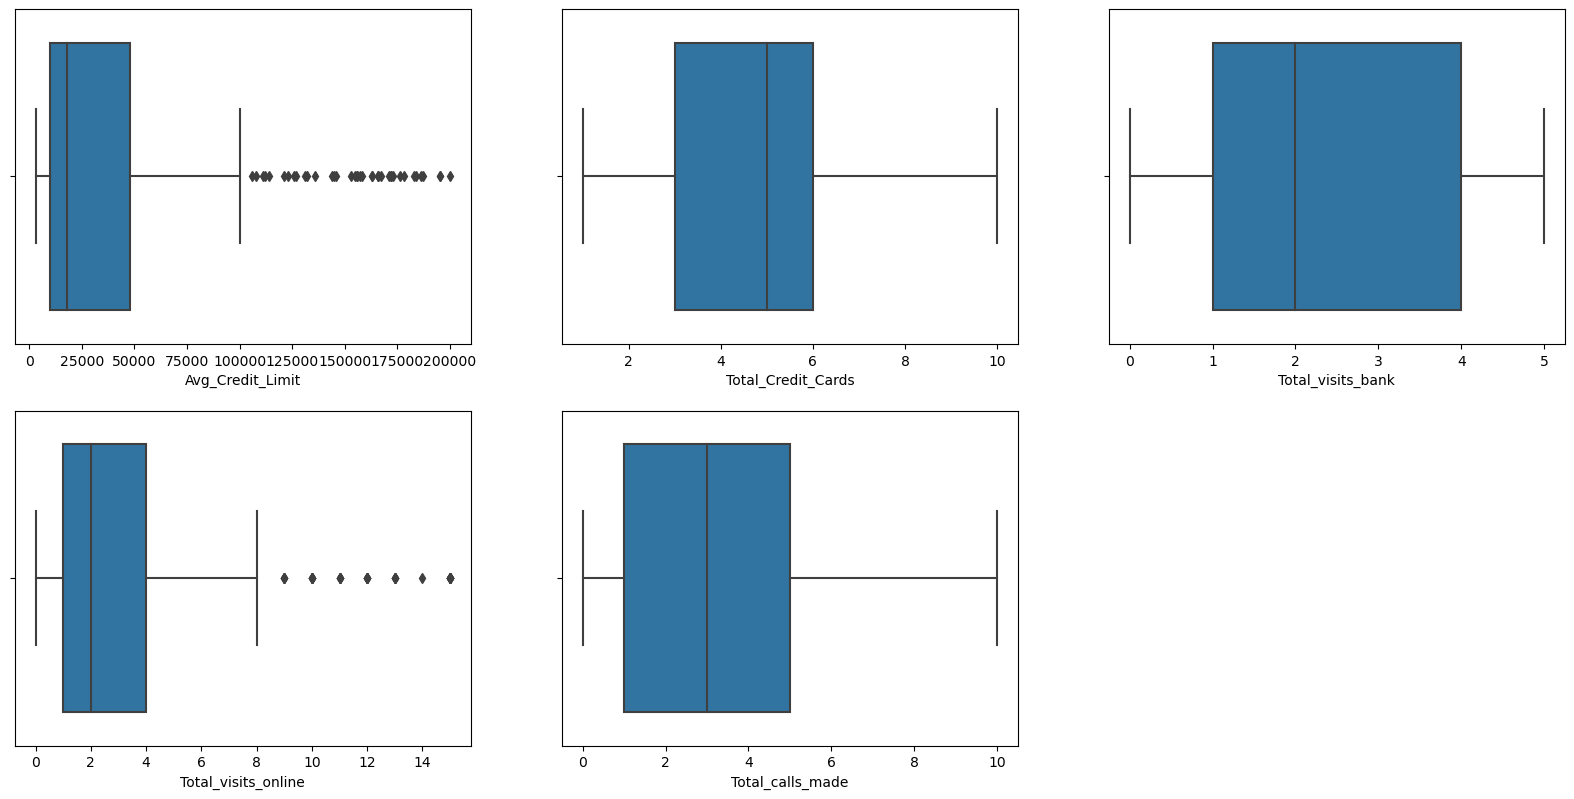

In [15]:
#Univariate analysis

i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

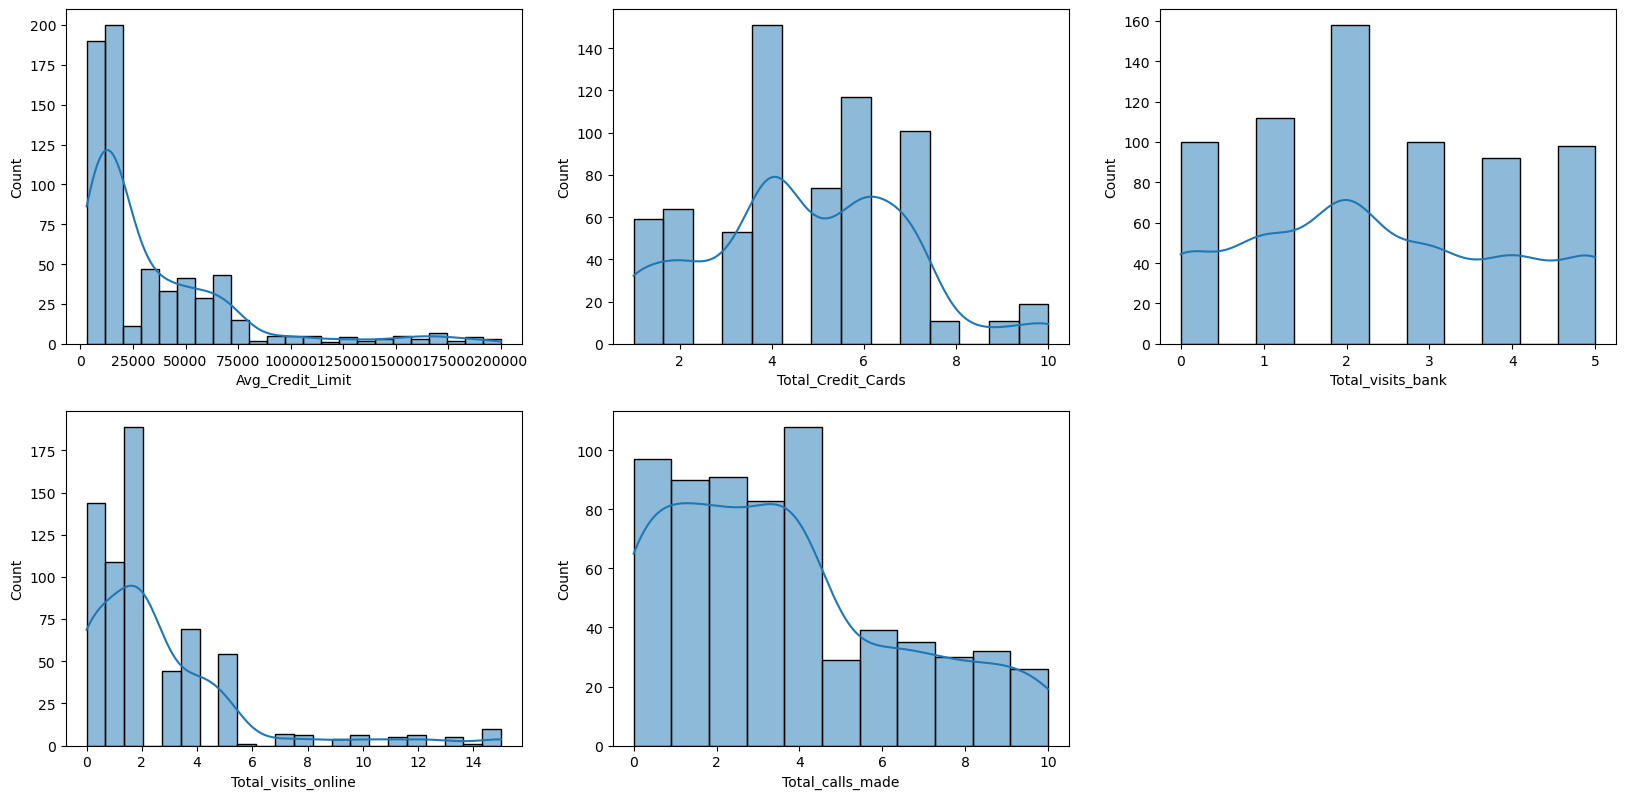

In [16]:
i=1
plt.figure(figsize=(20,20))
for j in df.columns :
    plt.subplot(4,3,i)
    sns.histplot(data=df, x=df[j],kde=True)
    i+=1

In [17]:
# Bivariate Analysis
df.corr()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


<AxesSubplot:>

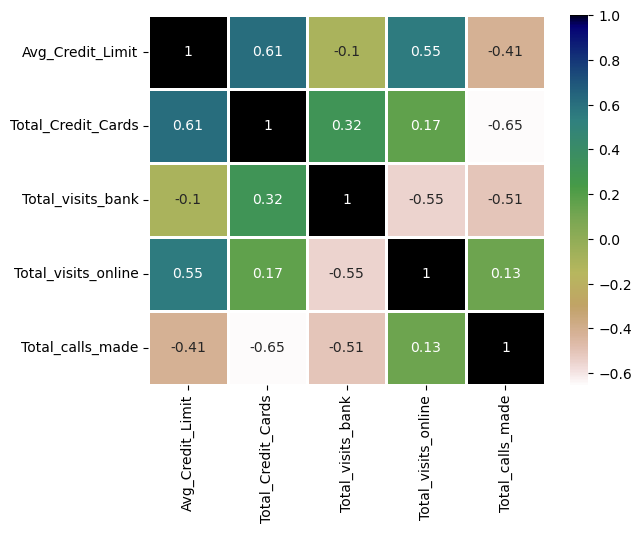

In [18]:
sns.heatmap(df.corr(),cmap='gist_earth_r',linewidth=1,annot=True)  # corr matrix

In [19]:
# Standardize the whole dataset

sc=StandardScaler() #scaling of data
scaled=sc.fit_transform(df)
scaled_data=pd.DataFrame(scaled,columns=df.columns)
scaled_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


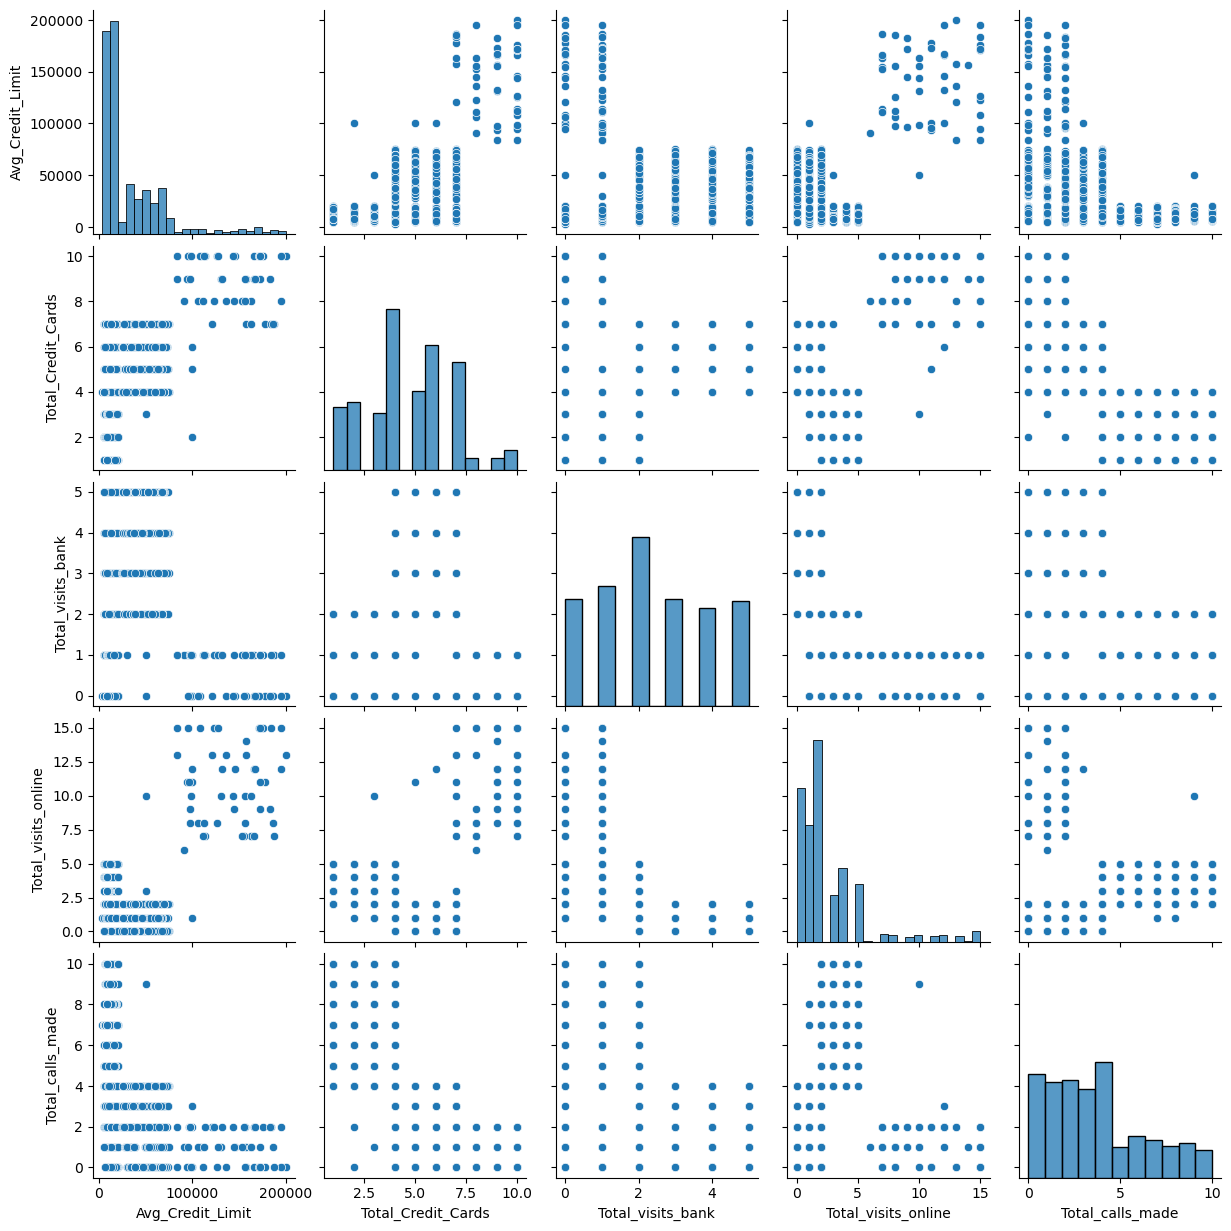

In [20]:
sns.pairplot(df) # pair plot of numeric columns

In [21]:
# within-cluster sum of square
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [22]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

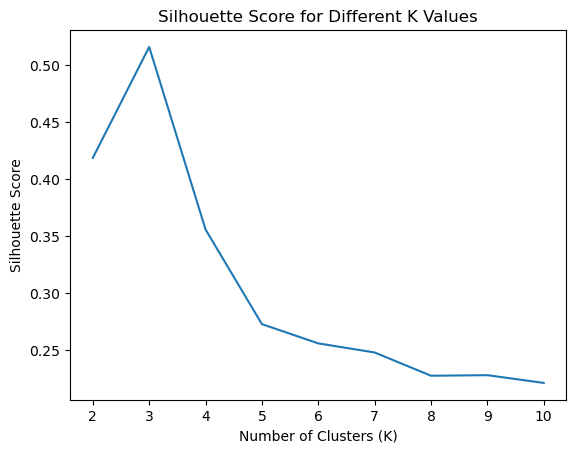

In [23]:
#Use a line plot all scores for different sizes of K 
plt.plot(range(2,11),silhouette_scores)
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

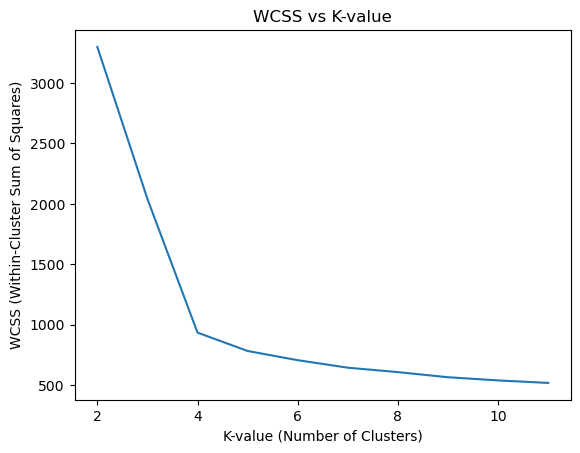

In [24]:
plt.plot(range(2, 12), wcss)
plt.xlabel('K-value (Number of Clusters)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('WCSS vs K-value')
plt.show()

In [25]:
# build the final model

km1 = KMeans(n_clusters=3)
km1.fit(scaled_data)
y=km1.predict(scaled_data)
df['label']=y

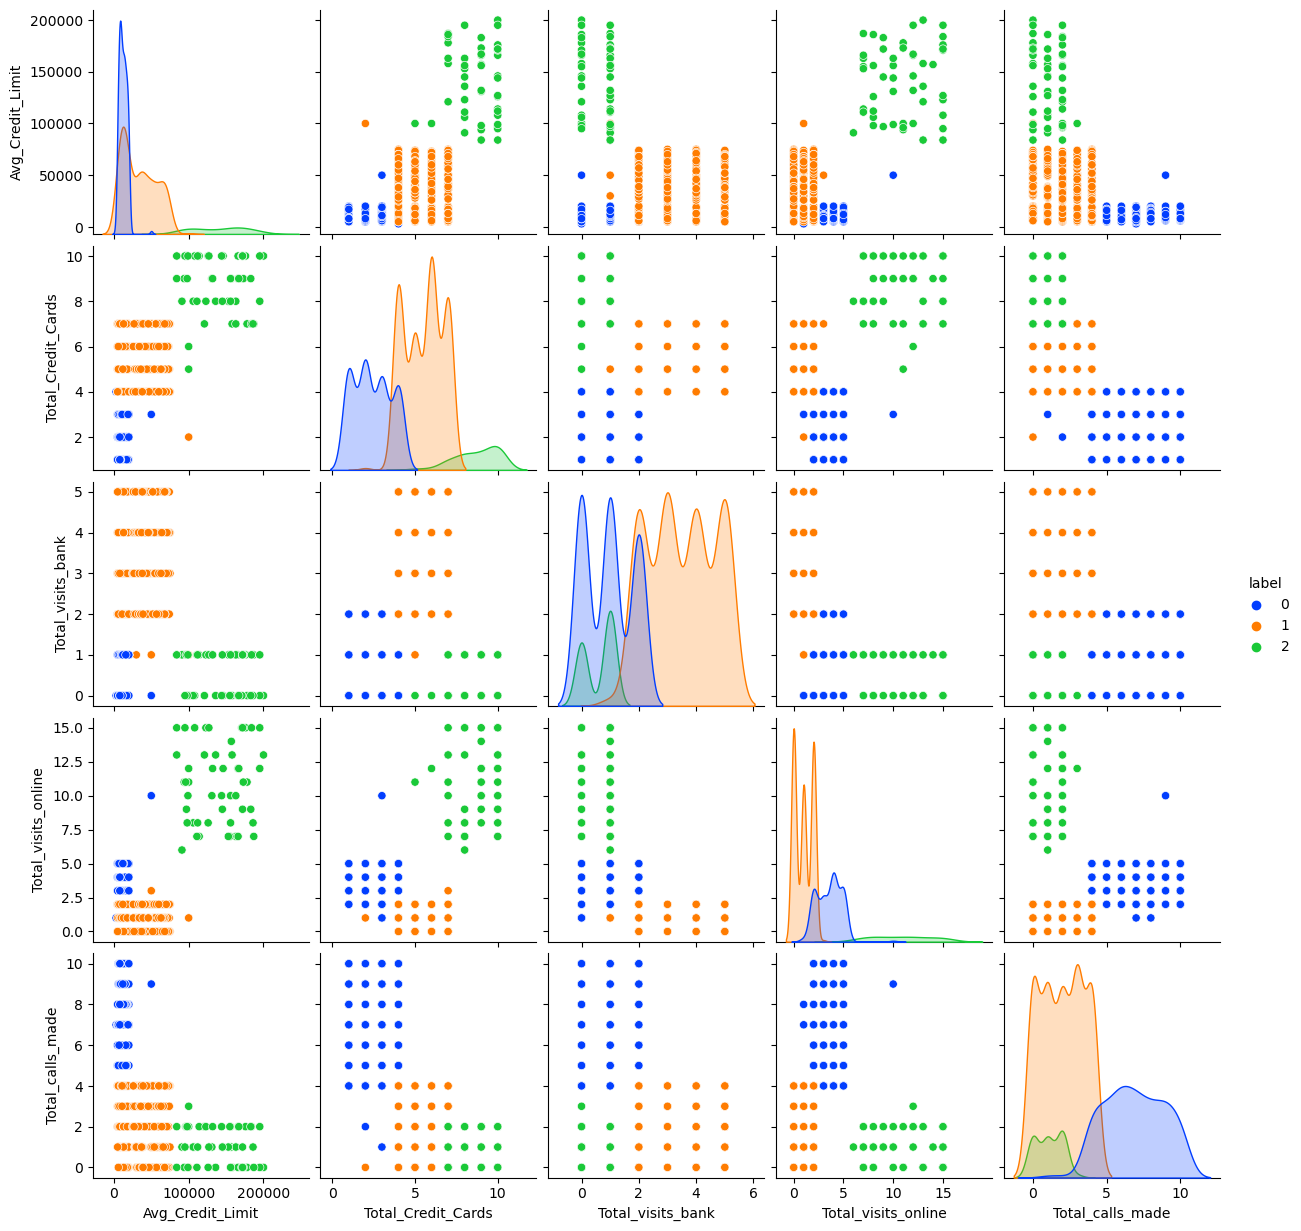

In [26]:
# Observe Cluster behavior with different columns

sns.pairplot(df,hue='label',palette='bright')

In [27]:
# print Co-ordinates of all centeroids

center=km1.cluster_centers_
center

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [28]:
# silhouette scores for the final model
kmean_silhouette = silhouette_score(scaled_data, km1.labels_)
print("Silhouette Score:", kmean_silhouette)


Silhouette Score: 0.5157182558881063


# Problem Statement 3: DBSCAN Clustering

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
# Calculate the correlation matrix

correlation_matrix = df.corr()

In [32]:
correlation_matrix 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [33]:
 #Find the column with the least correlation to other columns
least_correlated_column = correlation_matrix.iloc[:-1,:-1].min().idxmin()


In [34]:
# Drop the column with the least correlation
df = df.drop(columns=least_correlated_column)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [35]:
# Display the updated DataFrame
print("Updated DataFrame:")
print(df.head())

Updated DataFrame:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


In [36]:
#Encode the "Gender" column using get_dummies() function

df = pd.get_dummies(df, columns=['Gender'])
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [37]:
#Perform Density-Based Spatial Clustering of Applications with Noise (DBSCAN) clustering with eps=12.5 and min_samples=4

eps = 12.5
min_samples = 4
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df)
clusters

array([ 0,  0, -1,  0,  0,  0, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  4,  2,
        3,  2,  4,  2,  3,  2,  0,  2,  4,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2, -1,  2,  3,  2,  4,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1,  2, -1, -1, -1, -1, -1, -1], dtype=int64)

In [38]:
# Print the size of each cluster and also the size of outliers' cluster

unique_clusters, cluster_counts = np.unique(clusters, return_counts=True)
outliers_count = np.count_nonzero(clusters == -1)
for cluster, count in zip(unique_clusters, cluster_counts):
    print(f"Cluster {cluster}: {count} data points")
print(f"outliers: {outliers_count} data points")

Cluster -1: 18 data points
Cluster 0: 112 data points
Cluster 1: 8 data points
Cluster 2: 34 data points
Cluster 3: 24 data points
Cluster 4: 4 data points
outliers: 18 data points


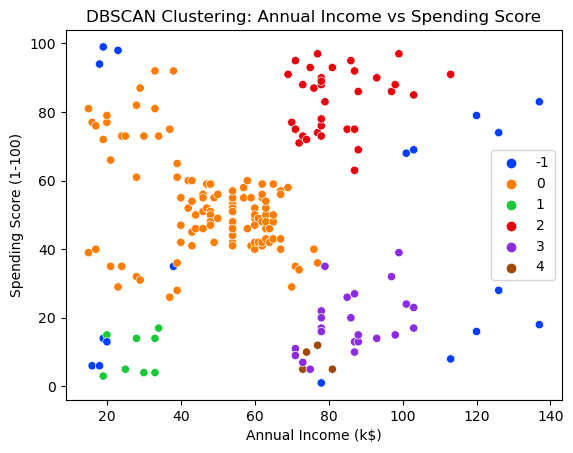

In [39]:
#Using a scatter plot shows how annual income corresponds to the spending rates of customer

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters,palette='bright')
plt.title('DBSCAN Clustering: Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Problem Statement 4:  Groceries data

In [40]:
# . Install mlxtend library for further process
!pip install mlxtend

In [41]:
import mlxtend

In [42]:
# Load the Groceries data.csv data into a Data frame
df = pd. read_csv('groceries_data.csv')
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,21-07-2015,tropical fruit,2015,7,21,1
1,2552,01-05-2015,whole milk,2015,5,1,4
2,2300,19-09-2015,pip fruit,2015,9,19,5
3,1187,12-12-2015,other vegetables,2015,12,12,5
4,3037,02-01-2015,whole milk,2015,1,2,4


In [43]:
# Print customer data where the member number is 1001

customer_data = df[df['Member_number'] == 1001]
print(customer_data)

       Member_number        Date     itemDescription  year  month  day  \
364             1001  20-01-2015         frankfurter  2015      1   20   
5695            1001  05-02-2015         frankfurter  2015      2    5   
6612            1001  14-04-2015                beef  2015      4   14   
9391            1001  02-07-2014             sausage  2014      7    2   
11046           1001  12-12-2014          whole milk  2014     12   12   
16513           1001  20-01-2015                soda  2015      1   20   
21844           1001  05-02-2015                curd  2015      2    5   
22761           1001  14-04-2015         white bread  2015      4   14   
25540           1001  02-07-2014          whole milk  2014      7    2   
27195           1001  12-12-2014                soda  2014     12   12   
32575           1001  20-01-2015  whipped/sour cream  2015      1   20   
32727           1001  02-07-2014          rolls/buns  2014      7    2   

       day_of_week  
364             

In [44]:
#Create a new column as “item count”, and give the count as 1(because all customers bought 1 item on each day only)

df['item count'] = 1
df

,Member_number,Date,itemDescription,year,month,day,day_of_week,item count
0,1808,21-07-2015,tropical fruit,2015,7,21,1,1
1,2552,01-05-2015,whole milk,2015,5,1,4,1
2,2300,19-09-2015,pip fruit,2015,9,19,5,1
3,1187,12-12-2015,other vegetables,2015,12,12,5,1
4,3037,02-01-2015,whole milk,2015,1,2,4,1
...,...,...,...,...,...,...,...,...
38760,4471,10-08-2014,sliced cheese,2014,8,10,6,1
38761,2022,23-02-2014,candy,2014,2,23,6,1
38762,1097,16-04-2014,cake bar,2014,4,16,2,1
38763,1510,12-03-2014,fruit/vegetable juice,2014,3,12,2,1


In [45]:
# Drop unnecessary columns like "month","day","year","day_of_week"

df = df.drop(['year','month','day','day_of_week'],axis=1)
df.head()

,Member_number,Date,itemDescription,item count
0,1808,21-07-2015,tropical fruit,1
1,2552,01-05-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,02-01-2015,whole milk,1


In [46]:
# Group data by member id and items, and set their value as item count

grouped_df = df.groupby(['Member_number','itemDescription'])['item count'].sum().reset_index()
grouped_df

,Member_number,itemDescription,item count
0,1000,canned beer,1
1,1000,hygiene articles,1
2,1000,misc. beverages,1
3,1000,pastry,1
4,1000,pickled vegetables,1
...,...,...,...
34761,5000,onions,1
34762,5000,other vegetables,1
34763,5000,root vegetables,1
34764,5000,semi-finished bread,1


In [49]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


te = TransactionEncoder()
one_hot_encoded = te.fit_transform(grouped_df.groupby(['Member_number', 'itemDescription'])['item count'].sum().unstack().reset_index().fillna(0).drop(columns='Member_number'))
df_encoded = pd.DataFrame(one_hot_encoded, columns=te.columns_)
df_encoded

,,(,),-,.,/,H,I,T,U,...,p,q,r,s,t,u,v,w,y,z
0,True,False,False,False,False,False,False,True,False,False,...,True,False,True,True,True,True,False,False,False,False
1,False,False,False,True,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,True,True,True,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [50]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.025398,( )
1,0.026680,(a)
2,0.010005,(b)
3,0.020780,(c)
4,0.014366,(d)
...,...,...
100,0.010005,"(e, i, s)"
101,0.010005,"(e, r, n)"
102,0.012314,"(e, r, s)"
103,0.010005,"(e, t, r)"


In [51]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# Display frequent itemsets and association rules
print(frequent_itemsets)
print(rules)


      support      itemsets
0    0.025398           ( )
1    0.026680           (a)
2    0.010005           (b)
3    0.020780           (c)
4    0.014366           (d)
..        ...           ...
100  0.010005     (e, i, s)
101  0.010005     (e, r, n)
102  0.012314     (e, r, s)
103  0.010005     (e, t, r)
104  0.011801  (r, e, a,  )

[105 rows x 2 columns]
    antecedents consequents  antecedent support  consequent support   support  \
0           (a)         ( )            0.026680            0.025398  0.018214   
1           ( )         (a)            0.025398            0.026680  0.018214   
2           (c)         ( )            0.020780            0.025398  0.016162   
3           ( )         (c)            0.025398            0.020780  0.016162   
4           (d)         ( )            0.014366            0.025398  0.011544   
..          ...         ...                 ...                 ...       ...   
341      (a,  )      (e, r)            0.018214            0.021036  0.01

In [52]:
#Filter rules with lift >= 1 and confidence >= 0.5
filtered_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.5)]

In [53]:
#Print the frequent itemsets and rules
print("\nFrequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(filtered_rules)


Frequent Itemsets:
      support      itemsets
0    0.025398           ( )
1    0.026680           (a)
2    0.010005           (b)
3    0.020780           (c)
4    0.014366           (d)
..        ...           ...
100  0.010005     (e, i, s)
101  0.010005     (e, r, n)
102  0.012314     (e, r, s)
103  0.010005     (e, t, r)
104  0.011801  (r, e, a,  )

[105 rows x 2 columns]

Association Rules:
    antecedents consequents  antecedent support  consequent support   support  \
0           (a)         ( )            0.026680            0.025398  0.018214   
1           ( )         (a)            0.025398            0.026680  0.018214   
2           (c)         ( )            0.020780            0.025398  0.016162   
3           ( )         (c)            0.025398            0.020780  0.016162   
4           (d)         ( )            0.014366            0.025398  0.011544   
..          ...         ...                 ...                 ...       ...   
337      (a, r)      (e,  )      